<a href="https://colab.research.google.com/github/Davioliveira1305/Metodos-Numericos-2/blob/main/Tarefa1_2_MN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 1.2 de Metodos Numéricos 2

In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import numba, warnings
%matplotlib inline

np.set_printoptions(threshold=10)

In [57]:
# Caminho do Arquivo que se encontra no meu drive
path_to_img = "/content/drive/MyDrive/IMAGENS/camera.png"
# Leitura da imagem e conversão para a escala de cinza
img = cv2.imread(path_to_img, cv2.IMREAD_GRAYSCALE)

A matriz relacionada a imagem tem dimensões de 246 x 166


array([[  7,   7,   9, ...,  17,  15,  15],
       [  7,   7,   9, ...,  14,  15,  15],
       [ 10,  10,  10, ...,  14,  18,  12],
       ...,
       [113, 110, 112, ..., 143, 138, 138],
       [102, 108, 104, ..., 147, 143, 138],
       [149, 108, 148, ..., 141, 149, 141]], dtype=uint8)
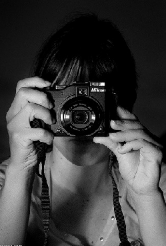

In [58]:
print(f'A matriz relacionada a imagem tem dimensões de {img.shape[0]} x {img.shape[1]}')
img

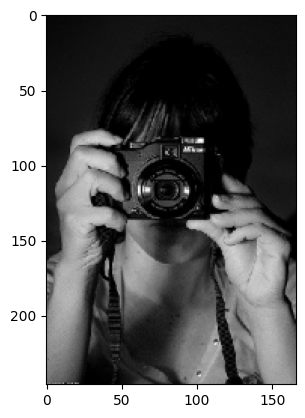

In [59]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

Temos que inserir uma borda de zeros no eixo x e no eixo y da matriz para a passagem do filtro.

In [60]:
img = np.insert(img, 0, 0, axis=1)
img = np.insert(img, img.shape[1], 0, axis=1)
img = np.insert(img, 0, 0, axis=0)
img = np.insert(img, img.shape[0], 0, axis=0)

In [61]:
print(f'Nova dimensão da matriz: {img.shape[0]} x {img.shape[1]}')
print(img)

Nova dimensão da matriz: 248 x 168
[[  0   0   0 ...   0   0   0]
 [  0   7   7 ...  15  15   0]
 [  0   7   7 ...  15  15   0]
 ...
 [  0 102 108 ... 143 138   0]
 [  0 149 108 ... 149 141   0]
 [  0   0   0 ...   0   0   0]]


## Suavização da imagem utilizando o filtro Gaussiano

In [62]:
warnings.filterwarnings('ignore')
# Biblioteca para acelerar códigos python
@numba.jit
def filtro_gaussiano(img):
  # Matriz para aplicar o filtro gaussiano
  gaussian = np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]])
  gaussian = gaussian.flatten()
  # Matriz de zeros que será a nossa nova imagem depois da aplicação do filtro gaussiano
  nova_imagem = np.zeros((img.shape[0]-2, img.shape[1]))
  for i in range(0, img.shape[0]-2):# -2 porque como o filtro é 3x3 se formos alem disso ultrapassa o tamanho
    for j in range(0, img.shape[1]-2):
      piece_img = img[i:i+3, j:j+3]
      nova_imagem[i-1][j-1] = round(np.sum(np.multiply(gaussian, piece_img.flatten()))/16)
  return nova_imagem


In [63]:
img_gauss = filtro_gaussiano(img)

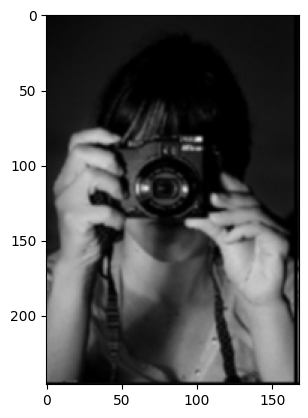

In [64]:
plt.imshow(img_gauss, cmap='gray', vmin=0, vmax=255)

## Filtro Convulacional de Gradiente

### Filtro de Sobel na direção x

In [65]:
warnings.filterwarnings('ignore')
# Biblioteca para acelerar códigos python
@numba.jit
def filtro_sobel_x(img):
  # Matriz para aplicar o filtro de Sobel na direção x
  sobel_x = np.array(
    [[1/4, 2, 1/4],
     [0, 0, 0],
     [-1/4, -2/4, -1/4]]
  )
  sobel_x = sobel_x.flatten()
  # Matriz de zeros que será a nossa nova imagem depois da aplicação do filtro gaussiano
  nova_imagem_x = np.ndarray(shape=(img.shape[0]-2, img.shape[1] - 2), dtype=int)
  nova_imagem_x.fill(0)
  for i in range(0, nova_imagem_x.shape[0]-2):
    for j in range(0, nova_imagem_x.shape[1]-2):
      piece_img = img[i:i+3, j:j+3]
      nova_imagem_x[i-1][j-1] = round(np.sum(np.multiply(sobel_x, piece_img.flatten())))
  return nova_imagem_x

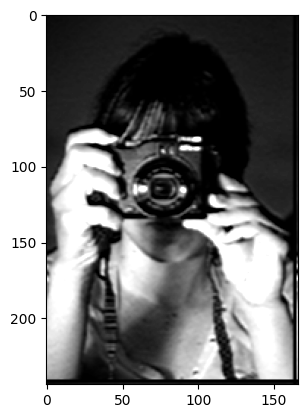

In [66]:
# Imagem gerada pelo filtro de sobel na direção x
img_sobel_dirx = filtro_sobel_x(img_gauss)
plt.imshow(img_sobel_dirx, cmap='gray', vmin=0, vmax=255)

### Filtro de sobel na direção y

In [67]:
warnings.filterwarnings('ignore')
# Biblioteca para acelerar códigos python
@numba.jit
def filtro_sobel_y(img):
  # Matriz para aplicar o filtro de Sobel na direção y
  sobel_y = np.array(
    [[1/4, 0, -1/4],
     [2/4, 0, -2/4],
     [1/4, 0, -11/4]]
  )
  sobel_y = sobel_y.flatten()
  # Matriz de zeros que será a nossa nova imagem depois da aplicação do filtro gaussiano
  nova_imagem_y = np.ndarray(shape=(img.shape[0]-2, img.shape[1] - 2), dtype=int)
  nova_imagem_y.fill(0)
  for i in range(0, nova_imagem_y.shape[0]-2):
    for j in range(0, nova_imagem_y.shape[1]-2):
      piece_img = img[i:i+3, j:j+3]
      nova_imagem_y[i-1][j-1] = round(np.sum(np.multiply(sobel_y, piece_img.flatten())))
  return nova_imagem_y

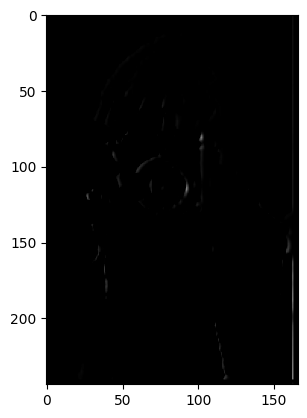

In [68]:
# Imagem gerada pelo filtro de sobel na direção y
img_sobel_diry = filtro_sobel_y(img_gauss)
plt.imshow(img_sobel_diry, cmap='gray', vmin=0, vmax=255)

### Tópico 2.3. em cada uma das matrizes, A e B, eleve ao quadrado os valores dos elementos;


In [69]:
# Cada elemento da matriz será elevado ao quadrado
img_sobel_dirx = img_sobel_dirx ** 2
# Cada elemento da Matriz será elevado ao quadrado
img_sobel_diry = img_sobel_diry ** 2

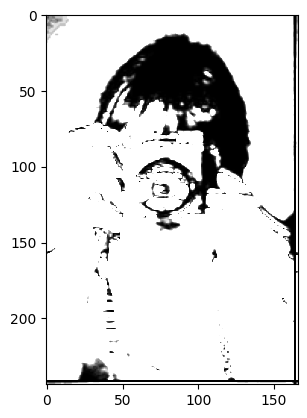

In [70]:
# Imagem com os valores da sua respectiva matriz elevado a 2 depois da aplicação do filtro de sobel na direção x
plt.imshow(img_sobel_dirx, cmap='gray', vmin=0, vmax=255)

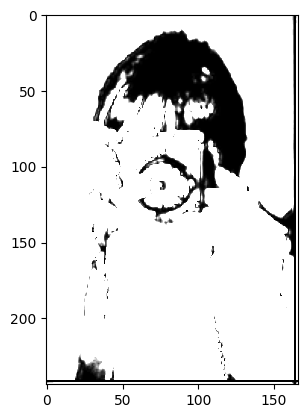

In [71]:
# Imagem com os valores da sua respectiva matriz elevado a 2 depois da aplicação do filtro de sobel na direção y
plt.imshow(img_sobel_diry, cmap='gray', vmin=0, vmax=255)

### Tópico 2.4. some as duas matrizes A e B modificadas no passo 2.3 e tire a raiz quadrada  de cada elemento dessa matriz, C

In [72]:
# Somando as duas matrizes
img_sobel_final = np.add(img_sobel_dirx, img_sobel_diry)
# Tirando a raiz quadrada de cada elemento da matriz
img_sobel_final = np.sqrt(img_sobel_final)
img_sobel_final.astype(int)

array([[21, 23, 24, ...,  0,  0, 22],
       [22, 22, 24, ...,  0,  0, 23],
       [24, 21, 23, ...,  0,  0, 23],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [21, 23, 23, ...,  0,  0, 24]])

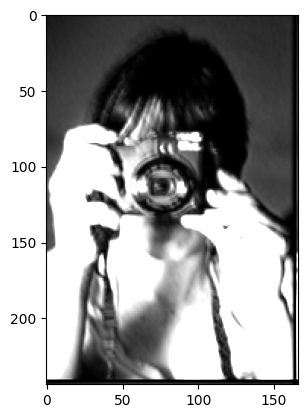

In [73]:
plt.imshow(img_sobel_final, cmap='gray', vmin=0, vmax=255)

In [82]:
warnings.filterwarnings('ignore')
# Biblioteca para acelerar códigos python
@numba.jit
def sobel(img):
  # Matriz para aplicar o filtro de Sobel na direção x
  sobel_x = np.array(
    [[1, 2, 1],
     [0, 0, 0],
     [-1, -2, -1]]
  )

  # Matriz para aplicar o filtro de Sobel na direção y
  sobel_y = np.array(
    [[1, 0, -1],
     [2, 0, -2],
     [1, 0, -1]]
  )

  sobel_x = sobel_x ** 2
  sobel_y = sobel_y ** 2
  sum = sobel_x + sobel_y
  G = np.sqrt(sum)
  G = G.flatten()
  # Matriz de zeros que será a nossa nova imagem depois da aplicação do filtro gaussiano
  nova_imagem = np.ndarray(shape=(img.shape[0]-2, img.shape[1] - 2), dtype=int)
  nova_imagem.fill(0)
  for i in range(0, nova_imagem.shape[0]-2):
    for j in range(0, nova_imagem.shape[1]-2):
      piece_img = img[i:i+3, j:j+3]
      nova_imagem[i-1][j-1] = round(np.sum(np.multiply(G, piece_img.flatten())))
  return nova_imagem

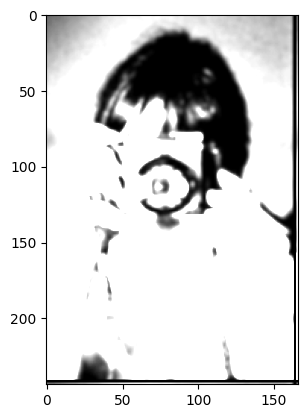

In [83]:
plt.imshow(sobel(img_gauss), cmap='gray', vmin=0, vmax=255)

### Tópicos 3 e 4. Escolha um valor (float)  para threshold e gere uma matriz Final, D, com  pixel 0 caso o pixel correspondente da matriz C seja menor do que o threshold pixel 1. caso o pixel correspondente da matriz C seja maior do que o threshold.


In [76]:
import random
warnings.filterwarnings('ignore')
# Biblioteca para acelerar códigos python
@numba.jit
def random_threshold(img):
  img_th = np.ndarray(shape=(img.shape[0], img.shape[1]), dtype=int)
  thereshold = 189.22
  for line in range(0, img.shape[0]):
    for column in range(0, img.shape[1]):
      if img[line][column] > thereshold:
        img_th[line][column] = 255
      else:
        img_th[line][column] = 0
  return img_th

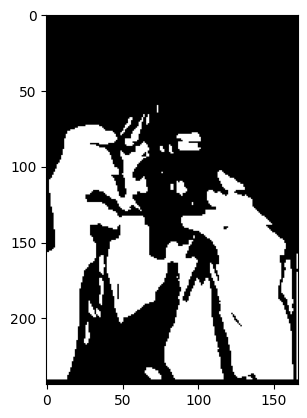

In [77]:
plt.imshow(random_threshold(img_sobel_final), cmap='gray', vmin=0, vmax=255)

# Algoritmo 2

## Tópico 1. Suavize a imagem, aplicando um filtro Gaussiano

In [78]:
img_gauss = filtro_gaussiano(img)

## Tópico 2. Na imagem do passo 1, aplique o filtro convolucional de Laplace, gerando uma imagem/matriz A


In [79]:
import random
warnings.filterwarnings('ignore')
# Biblioteca para acelerar códigos python
@numba.jit
def filtro_laplace(img):
  laplace = np.array(
      [[0, -1/4, 0],
      [-1/4, 4/4, -1/4],
      [0, -1/4, 0]]
  )

  laplace = laplace.flatten()

  img_laplace = np.ndarray(shape=(img.shape[0] - 2, img.shape[1] - 2), dtype=int)
  img_laplace.fill(0)
  for i in range(0, img.shape[0]-2):# -2 porque como o filtro é 3x3 se formos alem disso ultrapassa o tamanho
    for j in range(0, img.shape[1]-2):
      piece_img = img[i:i+3, j:j+3]
      new_pixel = np.sum(np.multiply(laplace, piece_img.flatten()))
      new_pixel = new_pixel ** 2
      img_laplace[i-1][j-1] = round(new_pixel)
  return img_laplace

In [80]:
filtro_laplace(img_gauss)

array([[  0,   1,   0, ...,   8,   2,   0],
       [  1,   0,   0, ...,   8,   2,   0],
       [  0,   0,   0, ...,   8,   2,   0],
       ...,
       [ 42,  20,  25, ..., 689, 452,  36],
       [132, 169, 289, ..., 400, 306, 240],
       [  0,   0,   0, ...,   8,   3,   0]])

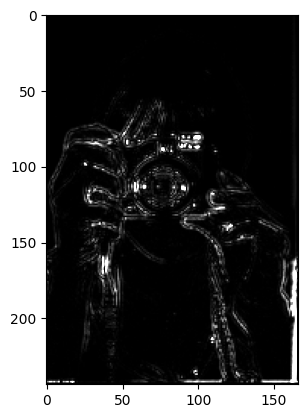

In [81]:
plt.imshow(filtro_laplace(img_gauss), cmap='gray', vmin=0, vmax=255)

## Último Tópico
1. caso o pixel correspondente da matriz A seja diferente de 0 dentro de uma tolerância (0.0001, por exemplo)
0. cado o pixel correspondente da matriz A seja igual a 0 dentro de uma tolerância (0.0001, por exemplo).
